In [ ]:
Created by Mingyu Liu

# 1. Problem identification

   The project is going to develop a prediction model to predict the gross of a Japanese Anime based on some features. The project aslo want to build a content-based recommendation system for clients. The project need to use NLP skills to transform the text data.
   
   The data resource is from Kaggle.com-Japanese Anime: An In-Depth IMDb Data Set.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd. read_csv('imdb_anime.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


Detailed Column Introduction
Title: The name of the animation.
Genre: The genre(s) under which the animation falls, e.g., Action, Adventure, etc.
User Rating: The IMDb user rating out of 10.
Number of Votes: The total number of IMDb users who have rated the animation.
Runtime: The duration of the animation in minutes.
Year: The year the animation was released or started airing.
Summary: A brief or full summary of the animation's plot. Full summaries are fetched when available.
Stars: List of main actors or voice actors involved in the animation.
Certificate: The certification of the animation, e.g., PG, PG-13, etc.
Metascore: The Metascore rating, if available, which is an aggregated score from various critics.
Gross: The gross earnings or box office collection of the animation.
Episode: A binary flag indicating whether the listing is for an episode of a series (1 for yes, 0 for no).
Episode Title: The title of the episode if the listing is for an episode; otherwise, it will be None.

In [4]:
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [5]:
df['Genre'].unique()

array(['Animation, Action, Adventure', 'Animation, Adventure, Comedy',
       'Animation, Drama, Family', 'Animation, Action, Drama',
       'Animation, Adventure, Drama', 'Animation, Action, Comedy',
       'Animation, Adventure, Family', 'Animation, Crime, Drama',
       'Animation, Drama, Fantasy', 'Animation, Comedy, Family',
       'Animation, Comedy, Drama', 'Animation, Family, Fantasy',
       'Animation, Drama, War', 'Animation, Adventure, Mystery',
       'Animation, Action, Fantasy', 'Animation, Action, Crime',
       'Animation, Drama', 'Animation, Biography, Drama',
       'Animation, Comedy, Romance', 'Animation, Adventure, Sci-Fi',
       'Animation, Sport, Thriller', 'Animation, Drama, Thriller',
       'Animation, Drama, Horror', 'Animation, Action, Sport',
       'Animation, Comedy', 'Animation, Action, Sci-Fi',
       'Animation, Drama, Romance', 'Animation, Adventure, Fantasy',
       'Animation, Sci-Fi, Thriller', 'Animation, Drama, Mystery',
       'Animation, Come

In [6]:
df.tail()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,"3,432",24 min,(2019– ),Tanjiro heads to his next location southeast; ...,NaN,TV-14,NaN,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,"3,309",24 min,(2019– ),Tanjiro gets separated from Zenitsu when he en...,NaN,TV-MA,NaN,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,"2,743",NaN,(1999– ),Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,NaN,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,"Ogie Banks,Deborah Sale Butler,John DeMita,Ric...",Not Rated,NaN,NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)
45716,Cinderella Nine,"Animation, Drama, Sport",6.0,6,24 min,(2019– ),On her very first day at Satogahama Municipal ...,NaN,NaN,NaN,6,1,Play Ball!


# 2. Data wrangling

In [7]:
print(df.isnull().sum())

Title                  0
Genre                  0
User Rating        20708
Number of Votes    20708
Runtime            13168
Year                 126
Summary            22170
Stars              32041
Certificate        17023
Metascore          45376
Gross              20708
Episode                0
Episode Title      10807
dtype: int64


In [8]:
# Calculate and display the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the percentage in a more readable format
print(null_percentage)

Title               0.000000
Genre               0.000000
User Rating        45.296061
Number of Votes    45.296061
Runtime            28.803290
Year                0.275609
Summary            48.493996
Stars              70.085526
Certificate        37.235602
Metascore          99.254107
Gross              45.296061
Episode             0.000000
Episode Title      23.638909
dtype: float64


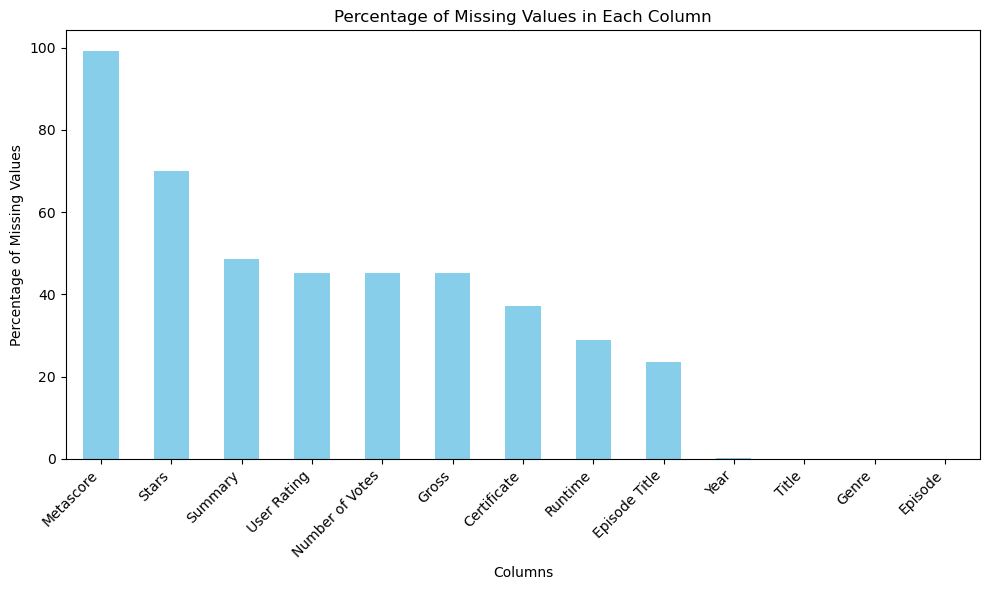

In [9]:
# Calculate the percentage of missing values for each column
null_percentage = df.isnull().mean() * 100

# Sort the percentages for better visualization
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Plot the null percentages
plt.figure(figsize=(10, 6))
null_percentage_sorted.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
# Drop columns with a lot of missing values
df = df.drop(columns=['Metascore', 'Episode Title'])

# Convert 'User Rating' to float (assuming it's stored as a string)
df['User Rating'] = pd.to_numeric(df['User Rating'], errors='coerce')

df['User Rating'].fillna(df['User Rating'].mean(),inplace=True)

# Convert 'Number of Votes' to int
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce')

df['Number of Votes'].fillna(df['Number of Votes'].mean(),inplace=True)

# Fill missing 'Certificate' with a placeholder
df['Certificate'] = df['Certificate'].fillna('Not Rated')

df.dropna(subset=['Summary','Stars'],inplace = True)

In [11]:

# Remove non-numeric characters (like $ and ,) from the 'Gross' column
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True)

# Convert the cleaned 'Gross' column to numeric (float)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['Gross'].fillna(df['Gross'].mean(),inplace=True)

# Ensure all values in 'Year' are converted to strings first
df['Year'] = df['Year'].astype(str)

# Use regex to extract the first 4 digits (the start year) from 'Year'
df['Year'] = df['Year'].str.extract('(\d{4})')

# Convert the extracted values to numeric (int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df['Year'].fillna(df['Year'].mean(),inplace = True)

In [12]:
# Ensure all values in 'Runtime' are converted to strings first
df['Runtime'] = df['Runtime'].astype(str)

# Extract numeric part from 'Runtime' and convert to int
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

df['Runtime'].fillna(df['Runtime'].mean(),inplace = True)

In [13]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

538


In [14]:
# Strip extra spaces from 'Genre' and ensure consistent formatting
df['Genre'] = df['Genre'].str.strip().str.lower()

# If there are multiple genres separated by commas, you could split them into lists
df['Genre'] = df['Genre'].str.split(',')

In [15]:
# Calculate the percentage of missing values for each column
null_percentage = df.isnull().mean() * 100

# Display the percentage in a more readable format
print(null_percentage)

Title              0.0
Genre              0.0
User Rating        0.0
Number of Votes    0.0
Runtime            0.0
Year               0.0
Summary            0.0
Stars              0.0
Certificate        0.0
Gross              0.0
Episode            0.0
dtype: float64


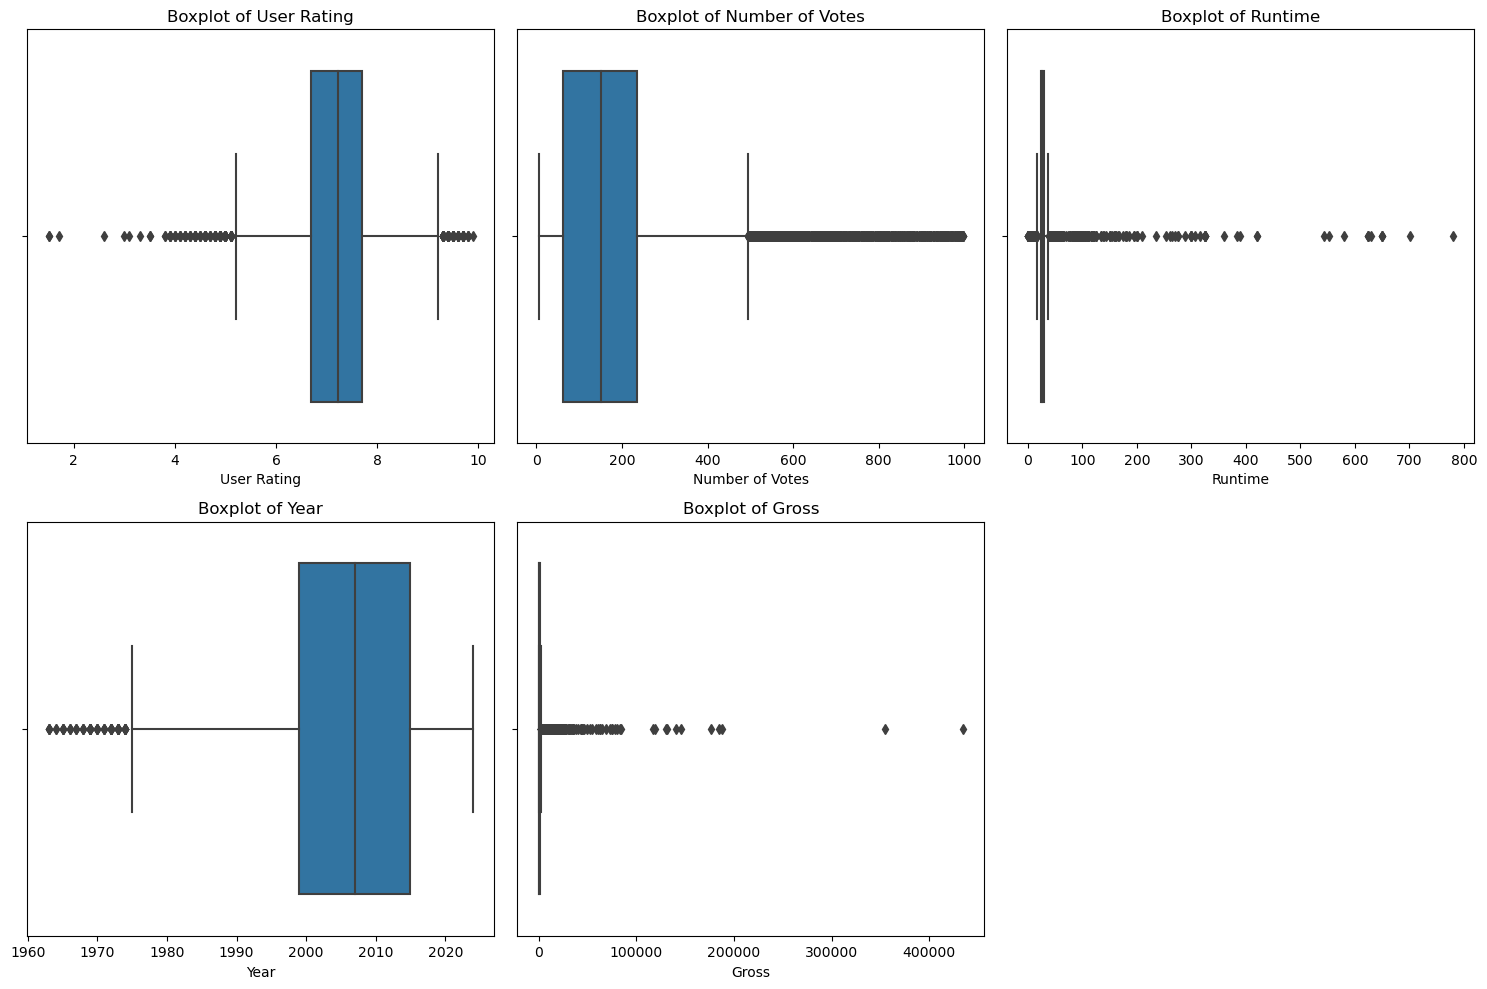

In [16]:
# List of numerical columns
numerical_columns = ['User Rating', 'Number of Votes', 'Runtime', 'Year', 'Gross']

# Create a boxplot for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [17]:
# Identify and print abnormal values (outliers) for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Abnormal values in {column}:")
    print(outliers[[column]])
    print("\n")

Abnormal values in User Rating:
       User Rating
483            4.9
728            4.4
809            4.6
813            4.9
1721           5.1
...            ...
45584          9.4
45614          5.0
45647          9.4
45652          9.5
45714          9.4

[244 rows x 1 columns]


Abnormal values in Number of Votes:
       Number of Votes
129              497.0
196              529.0
215              628.0
309              555.0
338              657.0
...                ...
45359            685.0
45377            815.0
45570            945.0
45610            800.0
45688            798.0

[730 rows x 1 columns]


Abnormal values in Runtime:
       Runtime
32        45.0
125      325.0
138      264.0
175      316.0
205       50.0
...        ...
44949     12.0
44950     12.0
44951     12.0
44952     12.0
44953     12.0

[618 rows x 1 columns]


Abnormal values in Year:
         Year
412    1967.0
755    1972.0
1683   1970.0
1720   1971.0
1736   1974.0
...       ...
8047   1970.0
8283 

In [18]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
for column in numerical_columns:
    df = remove_outliers(df, column)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5378 entries, 18 to 45692
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5378 non-null   object 
 1   Genre            5378 non-null   object 
 2   User Rating      5378 non-null   float64
 3   Number of Votes  5378 non-null   float64
 4   Runtime          5378 non-null   float64
 5   Year             5378 non-null   float64
 6   Summary          5378 non-null   object 
 7   Stars            5378 non-null   object 
 8   Certificate      5378 non-null   object 
 9   Gross            5378 non-null   float64
 10  Episode          5378 non-null   object 
dtypes: float64(5), object(6)
memory usage: 504.2+ KB


# 3. Exploratory data analysis

In [20]:
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Gross,Episode
18,Zom 100: Bucket List of the Dead,"[animation, action, comedy]",8.100000,151.937436,24.000000,2023.0,A worker in A foreign finance company who alwa...,"Shuichiro Umeda,Zeno Robinson,Makoto Furukawa,...",TV-MA,2118.000000,0
27,My Happy Marriage,"[animation, drama, fantasy]",8.300000,151.937436,28.803375,2023.0,An unhappy young woman from an abusive family ...,"Reina Ueda,Kaito Ishikawa,Houko Kuwashima,Dami...",TV-14,1421.000000,0
53,Scott Pilgrim Takes Off,"[animation, action, adventure]",7.218522,151.937436,28.803375,2023.0,A 20-something Toronto indie rocker's adventur...,"Mary Elizabeth Winstead,Aubrey Plaza,Brie Lars...",TV-14,2268.236303,0
96,Baki the Grappler,"[animation, action, drama]",7.500000,151.937436,24.000000,2001.0,Baki Hanma competes in an underground fighting...,"Bob Carter,Masami Kikuchi,Robert McCollum,Naom...",TV-PG,1947.000000,0
129,Mech Cadets,"[animation, action, adventure]",6.800000,497.000000,25.000000,2023.0,An underdog teen joins a group of young Cadets...,"Brandon Soo Hoo,Aparna Brielle,Victoria Grace,...",TV-Y7,497.000000,0


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,5378.0,7.234459,0.788476,5.2,6.80,7.218522,7.700000,9.2
Number of Votes,5378.0,147.766498,123.514046,5.0,48.25,151.937436,162.000000,510.0
Runtime,5378.0,25.479142,2.827148,15.0,24.00,25.000000,28.803375,35.0
Year,5378.0,2005.072823,11.745420,1975.0,1999.00,2007.000000,2015.000000,2024.0
Gross,5378.0,599.863957,843.985458,5.0,48.25,156.000000,497.000000,3173.0


In [22]:
df.groupby(['User Rating']).mean(numeric_only=True)

,Number of Votes,Runtime,Year,Gross
User Rating,,,,
5.200000,84.266824,25.232067,2008.346154,119.500000
5.300000,111.645161,24.801198,2009.677419,111.645161
5.400000,140.150000,25.221350,2013.600000,140.150000
5.500000,104.369641,25.990211,2012.171429,144.314286
5.600000,113.731707,25.610991,2011.146341,113.731707
5.700000,158.022727,26.370023,2010.818182,158.022727
5.800000,157.863346,26.303182,2009.593220,172.864407
5.900000,145.729162,24.858678,2012.111111,254.177778
6.000000,138.623262,26.301500,2009.625000,208.638889


<Axes: >

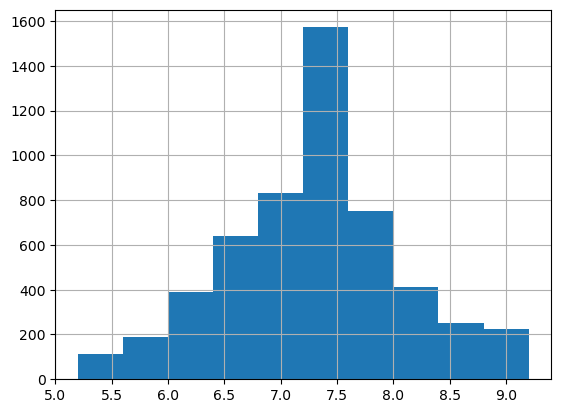

In [23]:
df['User Rating'].hist()

<Axes: >

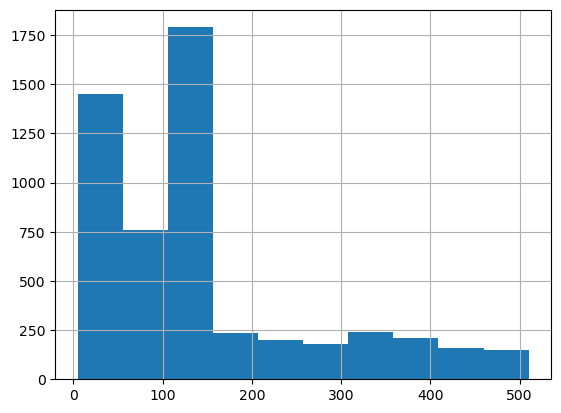

In [24]:
df['Number of Votes'].hist()

<Axes: >

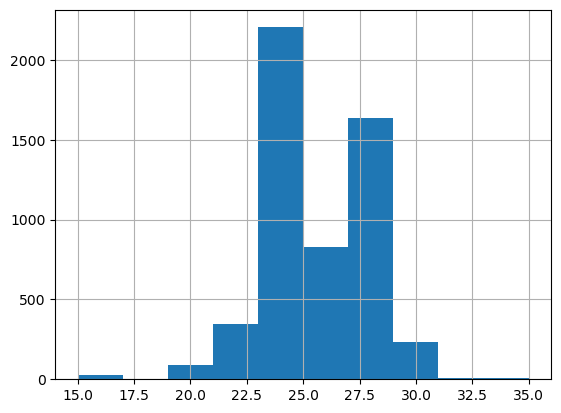

In [25]:
df['Runtime'].hist()

<Axes: >

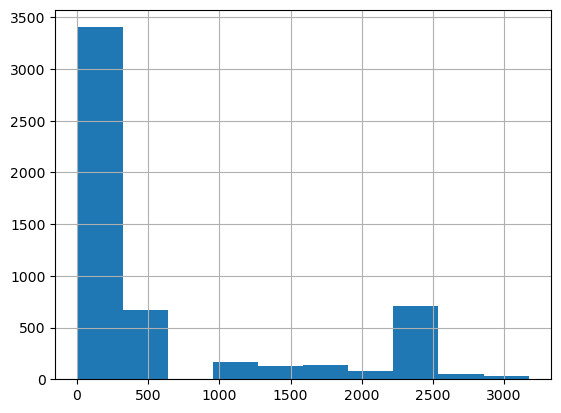

In [26]:
df['Gross'].hist()

C:\Users\myliu\AppData\Local\Temp\ipykernel_25548\1355120663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


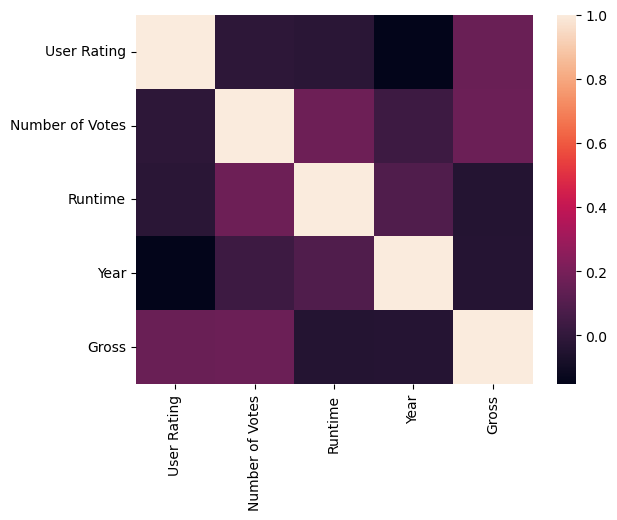

In [27]:
correlation_matrix = df.corr()
_ = sns.heatmap(correlation_matrix)

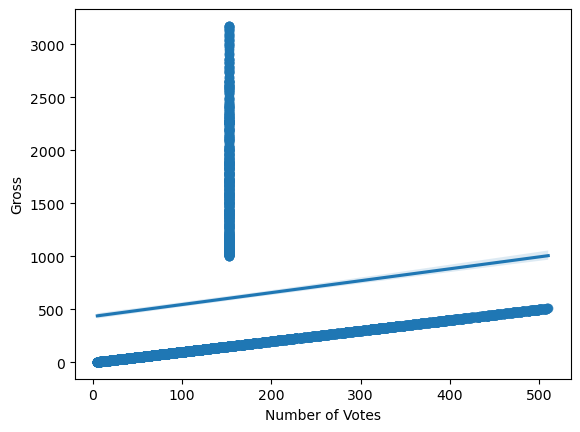

In [28]:
# Call the regplot method on the sns object, with parameters: x = 'average_house_size', y = 'price'
_ = sns.regplot(x='Number of Votes', y='Gross', data=df)

# 4. Pre-processing & training data development

In [29]:
df.Episode.unique()

array(['0', 'Episode', '1'], dtype=object)

In [30]:
# One-Hot Encoding for 'Episode'
df_Episode_encoded = pd.get_dummies(df['Episode'])

# Display the encoded dataframe

print(df_Episode_encoded)

       0  1  Episode
18     1  0        0
27     1  0        0
53     1  0        0
96     1  0        0
129    1  0        0
...   .. ..      ...
45666  0  1        0
45667  0  1        0
45680  0  1        0
45681  0  1        0
45692  0  1        0

[5378 rows x 3 columns]


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the columns to be transformed
text_columns = ['Title','Summary']

# Combine the text columns into a single dataframe
df_text = df[text_columns].fillna('')

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Combine text from all columns into one
combined_text = df_text.apply(lambda x: ' '.join(x), axis=1)

# Fit and transform the combined text data
tfidf_matrix = tfidf.fit_transform(combined_text)

# Convert the matrix to a dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display the transformed data
print(tfidf_df.head())

   000   10       100  1000   11   12   13   14   15   16  ...  zoids  zola  \
0  0.0  0.0  0.368972   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0   
1  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0   
2  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0   
3  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0   
4  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0   

        zom    zombie  zombies  zone  zordar  zoro  zou  zuzu  
0  0.222716  0.193624      0.0   0.0     0.0   0.0  0.0   0.0  
1  0.000000  0.000000      0.0   0.0     0.0   0.0  0.0   0.0  
2  0.000000  0.000000      0.0   0.0     0.0   0.0  0.0   0.0  
3  0.000000  0.000000      0.0   0.0     0.0   0.0  0.0   0.0  
4  0.000000  0.000000      0.0   0.0     0.0   0.0  0.0   0.0  

[5 rows x 5000 columns]


In [32]:
import numpy as np
from gensim.models import Word2Vec

# Define the columns to be transformed
words_columns = ['Genre', 'Stars']

# Combine the text columns into a single dataframe, converting non-string types to strings
df_words = df[words_columns].astype(str).fillna('')

# Combine text from all columns into one
combined_words = df_words.apply(lambda x: ' '.join(x), axis=1)

# Tokenize the combined text
sentences = combined_words.apply(lambda x: x.split())

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to get sentence vectors by averaging word vectors
def get_sentence_vector(sentence, model):
    if len(sentence) == 0:  # Handle empty sentences
        return np.zeros(100)
    vector = sum([model.wv[word] for word in sentence if word in model.wv], start=np.zeros(100))
    return vector / (len(sentence) + 1e-6)

# Apply the function to get word2vec vectors for each sentence
df['word2vec_vectors'] = sentences.apply(lambda x: get_sentence_vector(x, word2vec_model))

# Display the word vectors
print(df['word2vec_vectors'].head())

18     [-0.45611580057296797, 0.5248596564690802, 0.4...
27     [-0.42157700576016316, 0.4629013865985841, 0.4...
53     [-0.4174819325124158, 0.4941919924662016, 0.40...
96     [-0.4462939217496245, 0.5100319614966727, 0.43...
129    [-0.4100610716861315, 0.48792626709534703, 0.3...
Name: word2vec_vectors, dtype: object


In [33]:
from sklearn.preprocessing import StandardScaler

# point numeric_columns
numeric_columns = ['User Rating', 'Number of Votes', 'Runtime', 'Year', 'Gross']

# Select only the numeric columns for standardization
numeric_df = df[numeric_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_features = scaler.fit_transform(numeric_df)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_columns)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

   User Rating  Number of Votes   Runtime      Year     Gross
0     1.097842         0.033772 -0.523241  1.526454  1.798938
1     1.351519         0.033772  1.175935  1.526454  0.973017
2    -0.020214         0.033772  1.175935  1.526454  1.976962
3     0.336809         0.033772 -0.523241 -0.346791  1.596309
4    -0.551063         2.827743 -0.169495  1.526454 -0.121890


In [34]:
# Concatenate the encoded columns back into the DataFrame
df_data_scaled = pd.concat([scaled_df, df['word2vec_vectors'],tfidf_df,df_Episode_encoded], axis=1)

In [35]:
print(df_data_scaled)

       User Rating  Number of Votes   Runtime      Year     Gross  \
0         1.097842         0.033772 -0.523241  1.526454  1.798938   
1         1.351519         0.033772  1.175935  1.526454  0.973017   
2        -0.020214         0.033772  1.175935  1.526454  1.976962   
3         0.336809         0.033772 -0.523241 -0.346791  1.596309   
4        -0.551063         2.827743 -0.169495  1.526454 -0.121890   
...            ...              ...       ...       ...       ...   
45666          NaN              NaN       NaN       NaN       NaN   
45667          NaN              NaN       NaN       NaN       NaN   
45680          NaN              NaN       NaN       NaN       NaN   
45681          NaN              NaN       NaN       NaN       NaN   
45692          NaN              NaN       NaN       NaN       NaN   

                                        word2vec_vectors  000   10       100  \
0                                                    NaN  0.0  0.0  0.368972   
1          

In [36]:
df_data_scaled.dropna(inplace = True)

In [37]:
df_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 18 to 5375
Columns: 5009 entries, User Rating to Episode
dtypes: float64(5008), object(1)
memory usage: 66.0+ MB


In [38]:
# Calculate and display the percentage of null values in each column
null_percentage = df_data_scaled.isnull().mean() * 100

# Display the percentage in a more readable format
print(null_percentage)

User Rating        0.0
Number of Votes    0.0
Runtime            0.0
Year               0.0
Gross              0.0
                  ... 
zou                0.0
zuzu               0.0
0                  0.0
1                  0.0
Episode            0.0
Length: 5009, dtype: float64


In [39]:
from sklearn.model_selection import train_test_split

# If the 'word2vec_vectors' column contains arrays, flatten them
def flatten_vectors(row):
    if isinstance(row, (list, np.ndarray)):
        return np.mean(row)
    return row

# Apply the flattening to the 'word2vec_vectors' column (or any column with sequences)
df_data_scaled['word2vec_vectors'] = df_data_scaled['word2vec_vectors'].apply(flatten_vectors)

# Ensure all columns used are numeric
X = df_data_scaled.drop('Gross', axis=1)  # Features
y = df_data_scaled['Gross']  # Target variable

# Convert to numeric if necessary
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Check shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Use 'Gross' as the target variable
X = df_data_scaled.drop('Gross', axis=1)  # Features
y = df_data_scaled['Gross']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("\nShapes of the resulting splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Feature matrix shape: (1727, 5008)
Target vector shape: (1727,)

Shapes of the resulting splits:
X_train: (1381, 5008), X_test: (346, 5008)
y_train: (1381,), y_test: (346,)


# 5. Modeling

### 5.1 Use Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create the Random Forest model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 0.019411546403746417
R^2 Score: 0.9787324912227713


### 5.2 Use linear regression model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 0.7469106934572287
R^2 Score: 0.181676235447074


### 5.3 Use Neural Networks Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model with early stopping
model = MLPRegressor(hidden_layer_sizes=(84, 32), max_iter=1000, early_stopping=True, 
                     n_iter_no_change=10, random_state=42, learning_rate='adaptive')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 0.9302637611036586
R^2 Score: -0.019207449674975896


In [56]:
# Try a deep learning model using a feedforward neural network to predict "Gross" 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the features (important for deep learning models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer (number of units = number of features)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization

# Hidden layer 1
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='linear'))  # Predicting a continuous variable (Gross)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

C:\Users\myliu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.7497 - val_loss: 1.1343
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3669 - val_loss: 1.1498
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0410 - val_loss: 1.0343
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8699 - val_loss: 1.0052
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7707 - val_loss: 0.9961
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6813 - val_loss: 0.9819
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5772 - val_loss: 0.9375
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4710 - val_loss: 0.9510
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5164 - val_loss: 0.9316
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4377 - val_loss: 0.9264
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4065 - val_loss: 0.9229
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Epoch 69/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0935 - val_loss: 0.8444
Epoch 70/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0841 - val_loss: 0.8213
Epoch 71/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0904 - val_loss: 0.8208
Epoch 72/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0827 - val_loss: 0.8256
Epoch 73/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0931 - val_loss: 0.8147
Epoch 74/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0833 - val_loss: 0.8226
Epoch 75/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0813 - val_loss: 0.8322
Epoch 76/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0914 - val_loss: 0.8213
Epoch 77/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0982 - val_loss: 0.8173
Epoch 78/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0893 - val_loss: 0.8188
Epoch 79/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0969 - val_loss: 0.8354
Epoch 80/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/st

### 5.4 Use Gradient Boosting Regressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")

Gradient Boosting Mean Squared Error: 0.021561256719548966
Gradient Boosting R-squared: 0.9763772443991073


### 5.5 Build a content-based recommendation system

In [53]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Extract the 'word2vec_vectors' column, ensuring no missing values
content_features = df_data_scaled['word2vec_vectors'].dropna()

# Convert the list of word2vec vectors into a 2D array
content_features = np.array(content_features.tolist())  # Convert the series of lists into a NumPy 2D array

# Ensure that the array is 2D (each row is a vector)
if len(content_features.shape) == 1:
    content_features = content_features.reshape(-1, 1)

# Compute the cosine similarity between items
similarity_matrix = cosine_similarity(content_features)

# Display the similarity matrix
print(similarity_matrix[:5, :5])  # Display a subset for verification (first 5 rows/columns)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [55]:
# Define the function to get recommendations
def get_recommendations(item_index, similarity_matrix, df, top_n=5):
    # Get the similarity scores for the chosen item
    similarity_scores = list(enumerate(similarity_matrix[item_index]))
    
    # Sort the items by similarity score in descending order (excluding the item itself)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N most similar items (excluding the item itself)
    top_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    
    # Return the corresponding 'Title', 'Summary', and 'Gross' from the original dataframe
    return df.iloc[top_indices][['Title', 'Summary', 'Gross']]

# Example: Get recommendations for item 0
recommendations = get_recommendations(0, similarity_matrix, df, top_n=5)
print(recommendations)


                         Title  \
27           My Happy Marriage   
53     Scott Pilgrim Takes Off   
96           Baki the Grappler   
129                Mech Cadets   
159  Mashle: Magic and Muscles   

                                               Summary        Gross  
27   An unhappy young woman from an abusive family ...  1421.000000  
53   A 20-something Toronto indie rocker's adventur...  2268.236303  
96   Baki Hanma competes in an underground fighting...  1947.000000  
129  An underdog teen joins a group of young Cadets...   497.000000  
159  Into a world of magicians is born Mash, a youn...  3136.000000  


# 6.Conclusion

#### 6.1 Dataset review

    The data has 45717 entries and 13 columns, which include Genre,User Rating,Number of      
    Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode and Episode Title.
    Summary: A brief or full summary of the animation's plot. So,the project need use NLP skills
    to scale the data.There are a lot of missing values in the several columns.

#### 6.2 Data cleaning

    Handle Missing Values: Decide on strategies to fill missing values in numerical and categorical columns. 
    Convert Data Types: Convert some data columns from an object to numerical,string,datetime type.
    Outlier Detection: Identify and potentially remove or adjust outliers in numerical columns.
    Check for duplicates and dropped them.

#### 6.3 Exploratory Data Analysis (EDA)
    Summary Statistics: Calculate mean, median for numerical columns.
    Visualizations: Use histograms, box plots, and scatter plots to understand the distribution of numerical data.
    Correlation Analysis: Explore correlations between Gross and other numerical features.

#### 6.4 Pre-processing and data traning development

    The project used NLP to get the Vectorized Summary,selected only the numeric columns for standardization.
    The project imported TfidfVectorizer to define the columns to be transformed,which included 'Title'and 'Summary'.
    The project imported Word2Vec to define the columns of 'Genre' and 'Stars' to be transformed.
    The project split the data into training and testing sets, set test_size=0.2.

#### 6.5 Machine Learning Models and evaluation

    The project trained Random Forest Model,linear regression model,Neural Networks Model and Gradient Boosting Regressor.
    Based on the scores of evaluation, both Random Forest Model and Gradient Boosting Regressor have near 97 percent accuracy     of prediction on the gross of the Japanese Anime.
    
#### 6.6 Build a content-based recommendation system

    Using the scaled data, the project built a content-based recommendation system to find the similar animes for audiences. The system can provide recommendation service to help websites increase attraction.